### Notebook focado na aula sobre Dimensionalidade de dados, ou seja, entender os tamanhos e dimensões das amostras trabalhadas -> quantidade de colunas de uma dataset
### Espera-se, que ao longo do curso, possamos fazer análises dimensionais, exploratórias e de correlação entre as observações.
  - Reduzir a dimensionalidade dos dados -> deixar os modelos ajustados, perfeitamente, ao modelo de ML
  - Modelos com várias dimensões correm risco de underfitting de estimadores
  - Menos exames -> com o mesmo resultado efetivo de malignidade ou benignidade de câncer


In [ ]:
import pandas as pd

resultados_exames = pd.read_csv("exames.csv")
resultados_exames.head()

,id,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,...,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32,exame_33
0,842302,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.3001,...,184.60,2019.0,0.1622,0.6656,0.7119,0.786,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.0869,...,158.80,1956.0,0.1238,0.1866,0.2416,0.786,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.1974,...,152.50,1709.0,0.1444,0.4245,0.4504,0.786,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.2414,...,98.87,567.7,0.2098,0.8663,0.6869,0.786,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.1980,...,152.20,1575.0,0.1374,0.2050,0.4000,0.786,0.1625,0.2364,0.07678,0.854454


In [ ]:
# Ter um valor como base -> criar um modelo para ser comparado
# com o outro modelo, a partir da redução de dimensionalidade
# Random Forest -> não suportam dados NaN
from sklearn.model_selection import train_test_split
from numpy import random

SEED = 123143 # Fator de aleatoriedade
random.seed(SEED)
valores_exames = resultados_exames.drop(columns=['id', 'diagnostico'])
diagnosticos = resultados_exames['diagnostico']
treino_X, teste_X, treino_y, teste_y = train_test_split(valores_exames,
                                                        diagnosticos)

In [ ]:
# Atributo isnull() -> retorna False para valores != NaN
resultados_exames.isnull().sum() # Retorna o n° de células vazias de cada coluna
# Portanto, somente a coluna 35 -> "exame_33" possui 75% das observações


id               0
diagnostico      0
exame_1          0
exame_2          0
exame_3          0
exame_4          0
exame_5          0
exame_6          0
exame_7          0
exame_8          0
exame_9          0
exame_10         0
exame_11         0
exame_12         0
exame_13         0
exame_14         0
exame_15         0
exame_16         0
exame_17         0
exame_18         0
exame_19         0
exame_20         0
exame_21         0
exame_22         0
exame_23         0
exame_24         0
exame_25         0
exame_26         0
exame_27         0
exame_28         0
exame_29         0
exame_30         0
exame_31         0
exame_32         0
exame_33       419
dtype: int64

In [ ]:
# Utilização do modelo Random Forest -> conjunto de Decision Trees
from sklearn.ensemble import RandomForestClassifier
# n_estimator = quantidade de decision trees construídas | default = 100
classificador = RandomForestClassifier(n_estimators=100)
classificador.fit(treino_X, treino_y)
print(classificador.score(teste_X, teste_y))

ValueError: ignored

In [ ]:
# Modelo estimador
from sklearn.model_selection import train_test_split
from numpy import random
from sklearn.ensemble import RandomForestClassifier

SEED = 123143 # Fator de aleatoriedade
random.seed(SEED)
valores_exames = resultados_exames.drop(columns=['id', 'diagnostico'])
diagnosticos = resultados_exames['diagnostico']
valores_exames_v1 = valores_exames.drop(columns='exame_33')
treino_X, teste_X, treino_y, teste_y = train_test_split(valores_exames_v1,
                                                        diagnosticos,
                                                        test_size=0.3)
# n_estimator = quantidade de decision trees construídas | default = 100
classificador = RandomForestClassifier(n_estimators=100)
classificador.fit(treino_X, treino_y)
print("Resultado da classificação %.2f%%" %(classificador.score(teste_X, teste_y) * 100))

Resultado da classificação 92.40%


### Entender se esse classificador é eficiente ou não -> logo, precisamos verificar isso, de acordo com um outro classificador
  - Atavés de um *dummy_classifier*, temos uma baseline "ingênua" que determinará se nosso modelo criado é efetivo ou não.
  - Pegar o diagnóstico que mais ocorro, e conforme uma nova informação, classificar de acordo com a maior frequência de dados
  - ***Resultado***: como a baseline(dummie) teve uma acurácia de ~66% e nosso modelo teve uma performance de ~92%, utilizaremos o modelo criado como baseline para aperfeiçoamento e vizualidação das informações.

In [ ]:
from sklearn.dummy import DummyClassifier

SEED = 123143
random.seed(SEED)
# strategy aceita parâmetros de distribuição e frequência de observações
classificador_dummy = DummyClassifier(strategy="most_frequent")
classificador_dummy.fit(treino_X, treino_y)
print("Resultado da classificação dummie %.2f%%" %(classificador_dummy.score(teste_X, teste_y) * 100))

Resultado da classificação dummie 66.67%


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'exame_1'),
  Text(1, 0, 'exame_2'),
  Text(2, 0, 'exame_3'),
  Text(3, 0, 'exame_4'),
  Text(4, 0, 'exame_5'),
  Text(5, 0, 'exame_6'),
  Text(6, 0, 'exame_7'),
  Text(7, 0, 'exame_8'),
  Text(8, 0, 'exame_9'),
  Text(9, 0, 'exame_10')])

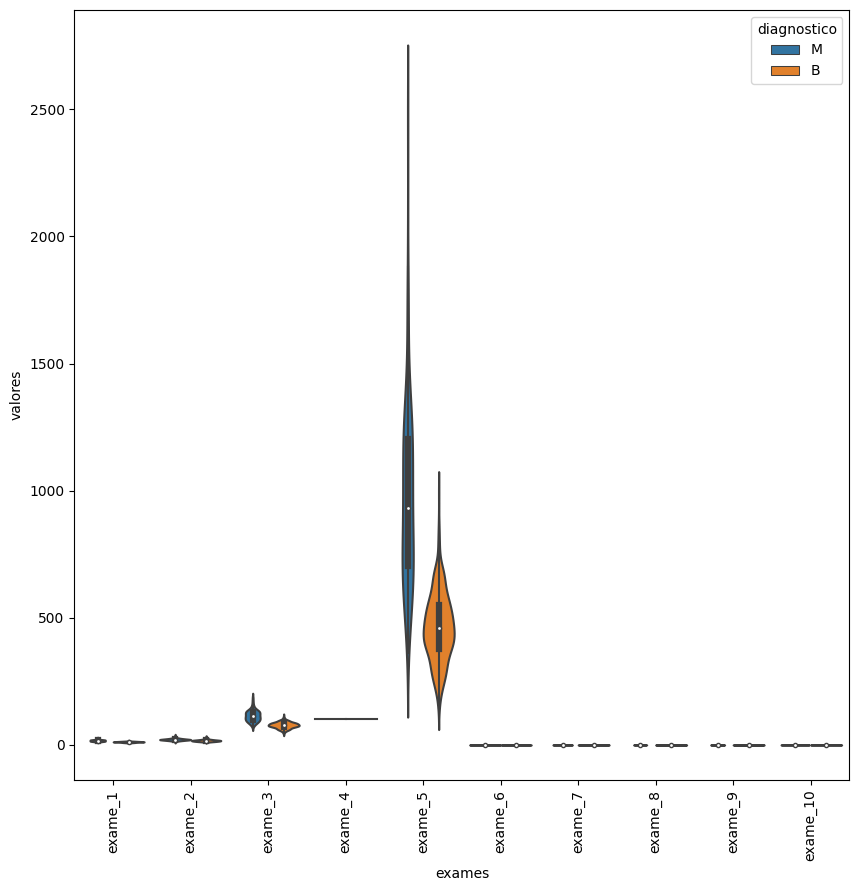

In [ ]:
# Estudar o comportamento dos dados -> "violin plot"
import seaborn as sns
import matplotlib.pyplot as plt
# axis_x = exame, axis_y = valores -> classes "B" e "M"
# pd.melt -> pega um dataframe e separa em variáveis e valores
# iloc[todas as linhas: valores iniciais:valores finais]
dados_plot = pd.concat([diagnosticos, valores_exames_v1.iloc[:,0:10]], axis=1)
dados_plot = pd.melt(dados_plot,
                     id_vars='diagnostico',
                     var_name='exames',
                     value_name='valores')
# B, exame_1 == valores # valores do exame_1 que caracterizam o diagnóstico como "B"
# M, exame_1 == valores # valores do exame_1 que caracterizam o diagnóstico como "M"
plt.figure(figsize=(10, 10))
sns.violinplot(x = 'exames',
               y = 'valores',
               hue = 'diagnostico',
               data = dados_plot)
# Ajustando a imagem plotada
plt.xticks(rotation=90)

### Interpretação do gráfico:
  - Lado esquerdo -> tipo maligno e lado direito -> tipo benigno
  - Crista da onda representa os valores que mais ocorrem para determinado tipo de câncer. Portanto, exames que possuem cristas de onde semelhantes, para diferentes tipos, são exames **ruins**
  - "exame_4", "exame_29" -> todos os resultados de valores iguais a 1, portanto, valores constantes => ou seja, não agregam em nada
  - "exame_15" -> com picos bem altos para variáveis "B"

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'exame_1'),
  Text(1, 0, 'exame_2'),
  Text(2, 0, 'exame_3'),
  Text(3, 0, 'exame_4'),
  Text(4, 0, 'exame_5'),
  Text(5, 0, 'exame_6'),
  Text(6, 0, 'exame_7'),
  Text(7, 0, 'exame_8'),
  Text(8, 0, 'exame_9'),
  Text(9, 0, 'exame_10')])

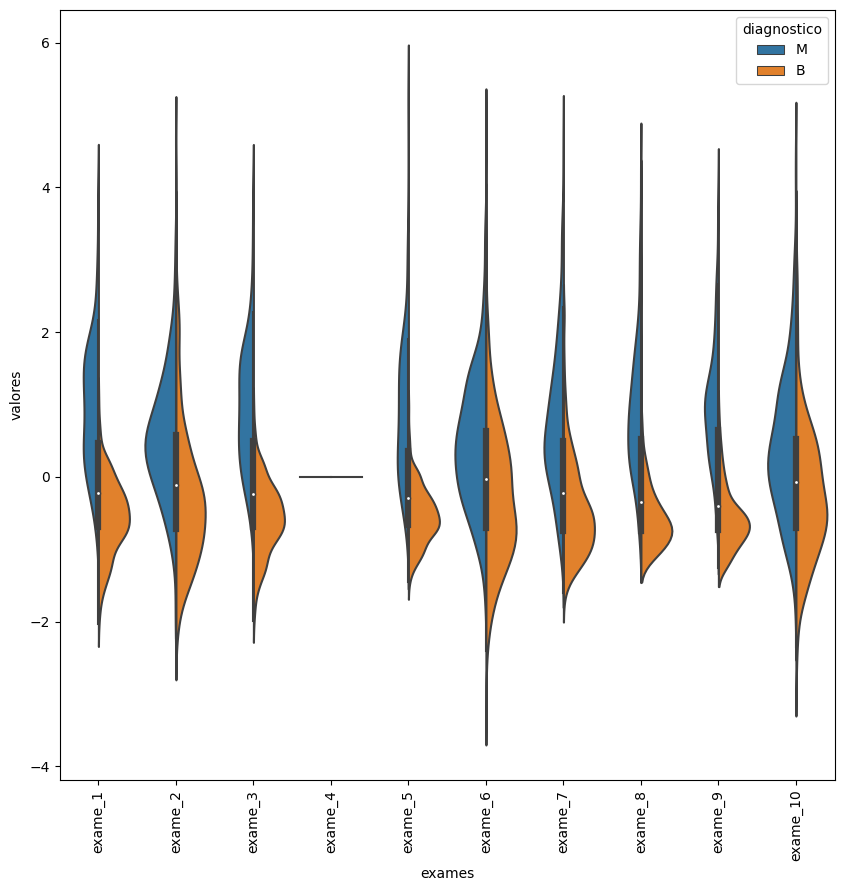

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Padronizador
padronizador = StandardScaler()
padronizador.fit(valores_exames_v1)
valores_exames_v2 = padronizador.transform(valores_exames_v1)
# valores_exames_v2 -> retorna um array, portanto, necessita-se mudar para um df
valores_exames_v2 = pd.DataFrame(data=valores_exames_v2,
                                 columns=valores_exames_v1.keys())

dados_plot = pd.concat([diagnosticos, valores_exames_v2.iloc[:,0:10]], axis=1)
dados_plot = pd.melt(dados_plot,
                     id_vars='diagnostico',
                     var_name='exames',
                     value_name='valores')

plt.figure(figsize=(10, 10))
sns.violinplot(x = 'exames',
               y = 'valores',
               hue = 'diagnostico',
               data = dados_plot,
               split=True) # splita entre os valores de "B" e "M"
# Ajustando a imagem plotada
plt.xticks(rotation=90)

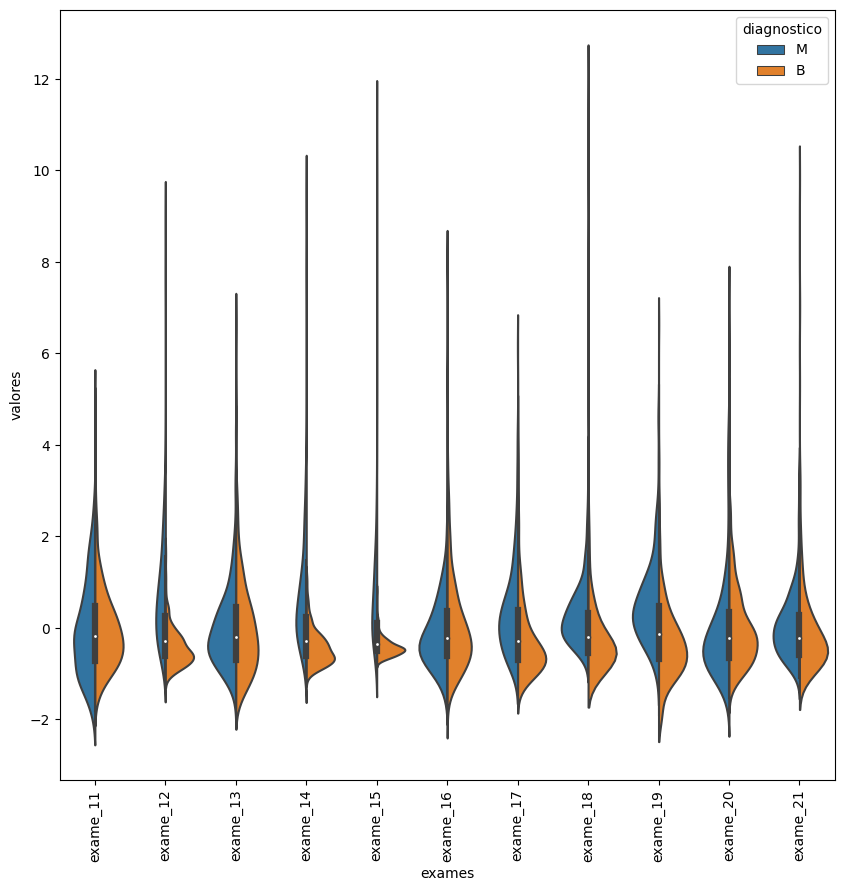

In [ ]:
# Função que auxilia no processo de plotagem gráfica
def grafico_violino(valores, inicio, fim):
  dados_plot = pd.concat([diagnosticos, valores.iloc[:,inicio:fim]], axis=1)
  dados_plot = pd.melt(dados_plot,
                     id_vars='diagnostico',
                     var_name='exames',
                     value_name='valores')

  plt.figure(figsize=(10, 10))
  sns.violinplot(x = 'exames',
               y = 'valores',
               hue = 'diagnostico',
               data = dados_plot,
               split=True) # splita entre os valores de "B" e "M"
# Ajustando a imagem plotada
  plt.xticks(rotation=90)

grafico_violino(valores_exames_v2, 10, 21)

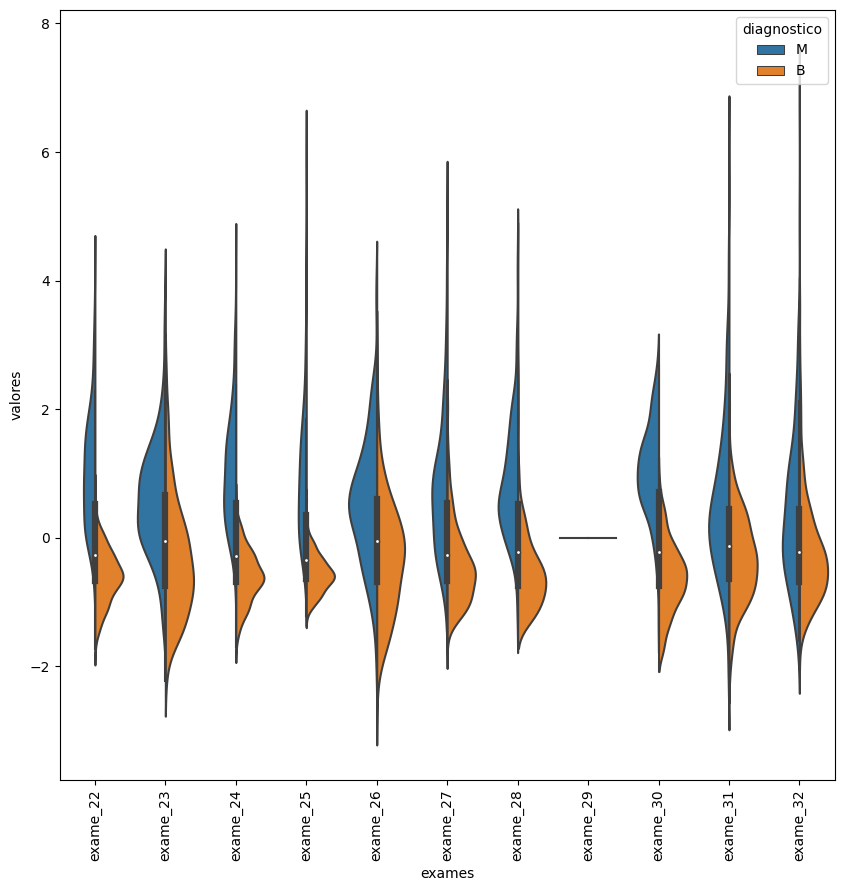

In [ ]:
grafico_violino(valores_exames_v2, 21, 32)

### Reduzimos os dados em duas dimensões sem ter perda, ou variações significativas no nível de acurácia do modelo.

In [ ]:
valores_exames_v3 = valores_exames_v2.drop(columns=['exame_4', 'exame_29'])
# Definir a classficação:
def Classificar(valores):
  # valores como o parâmetro de entrada
  SEED = 1234
  random.seed(SEED)
  treino_X, teste_X, treino_y, teste_y = train_test_split(valores,
                                                        diagnosticos,
                                                        test_size=0.3)
  classificador = RandomForestClassifier(n_estimators=100)
  classificador.fit(treino_X, treino_y)
  print("Resultado da classificação %.2f%%" %(classificador.score(teste_X, teste_y) * 100))
Classificar(valores_exames_v3)

Resultado da classificação 92.98%


### Cálculos de correlação de um dataframe -> .corr() ; retornando a correlação entre as variáveis.
  1. Quando mais próximo de 1, mais correlatas as variáveis são.
  2. Diagonal principal -> valores totalmente correlacionados (feature correlacionado com ela mesmo)
  3. Features correlacionadas: ou seja, as variáveis que precisarão ser dropadas do nosso dataset
    -  exame_1:     1.997855
    -  exame_3 :    1.997855
    -  exame_22:   1.993708
    - exame_24:    1.993708
  4. Correlação nem sempre implica a causalidade das variáveis


In [ ]:
valores_exames_v3.corr()

<Axes: >

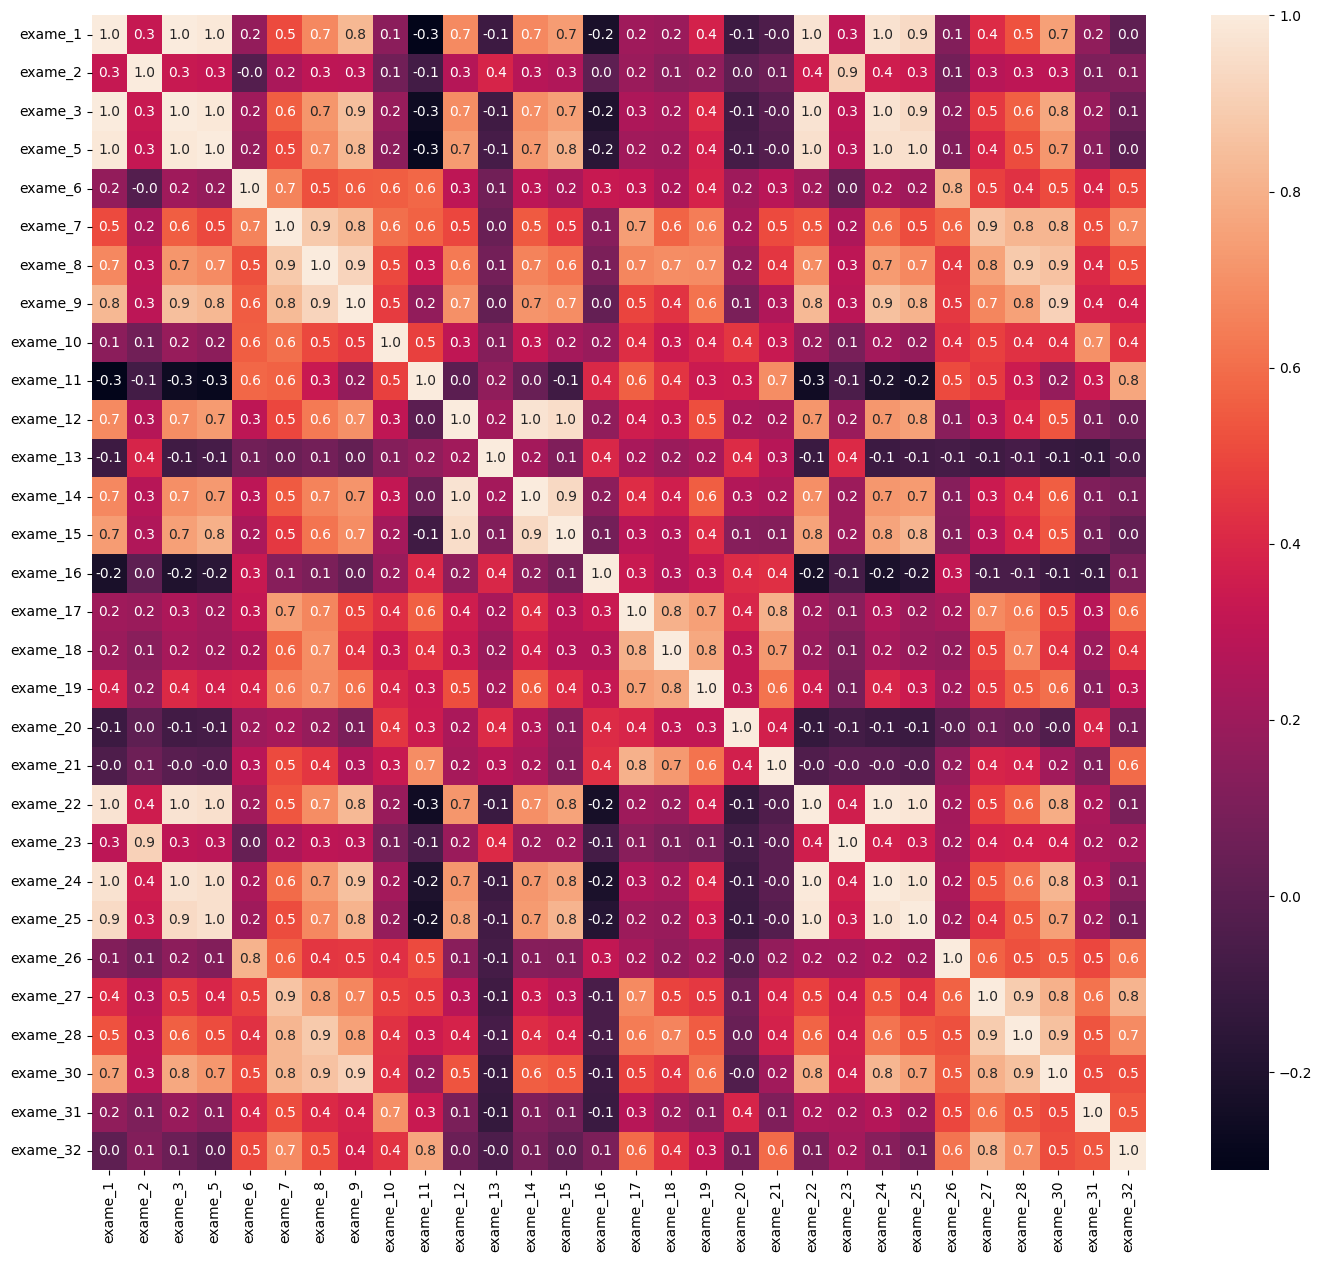

In [ ]:
# Criação de um heatmap que permita analisar a matriz de correlação
matriz_correlacao = valores_exames_v3.corr()
plt.figure(figsize=(17,15))
sns.heatmap(matriz_correlacao, annot=True, fmt='.1f')
# annot= True (valores de correlação entre variáveis)
# fmt = ".1f" -> demonstração com apenas uma casa decimal

In [ ]:
# Matriz que aparece os valores de correlação, somente > 0.9
matriz_correlacao_v1 = matriz_correlacao[matriz_correlacao > 0.99]
matriz_correlacao_v1

In [ ]:
matriz_correlacao_v2 = matriz_correlacao_v1.sum()
matriz_correlacao_v2

In [ ]:
# Por serem variáveis altamente correlacionadas -> excluí-las do dataset
variaveis_correlacionadas = matriz_correlacao_v2[matriz_correlacao_v2 > 1]
variaveis_correlacionadas

exame_1     1.997855
exame_3     1.997855
exame_22    1.993708
exame_24    1.993708
dtype: float64

In [ ]:
# Criação de uma nova variável que não contenha os respectivos exames
valores_exames_v4 = valores_exames_v3.drop(columns=variaveis_correlacionadas.keys())
valores_exames_v5 = valores_exames_v3.drop(columns=['exame_3', 'exame_24'])
valores_exames_v5.head()

,exame_1,exame_2,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,exame_12,...,exame_21,exame_22,exame_23,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
0,1.097064,-2.073335,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,...,0.907083,1.886690,-1.359293,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,...,-0.099444,1.805927,-0.369203,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,...,0.293559,1.511870,-0.023974,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,...,2.047511,-0.281464,0.133984,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,...,0.499328,1.298575,-1.466770,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [ ]:
# Medição de acurácia do classificador e ver se houve mudança
# Resultado pior do que havia sido feito, anteriormente -> dropar apenas uma delas
  # A de maior correlação (exame_1 ou exame_3; exame_22 ou exame_24)
  # Exclusão de mais duas features sem prejudicar a acurácia do resultado
Classificar(valores_exames_v5)

Resultado da classificação 92.98%


### Autimatizando processos

In [ ]:
# Selecionar as k melhores features -> gerando valores para as features
  # Gera um score para cada feature
# qui quadrado -> gera uma pontuação paras features; representação estatística
  # Não aceita termos negativos na sua entrada
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2 # chi

selecionar_kmelhores = SelectKBest(chi2, k = 5) # SelectKBest(funçãon nmr de features)

In [ ]:
# Remover a partir de v1 que estava normalizada
valores_exames_v6 = valores_exames_v1.drop(columns=['exame_4', 'exame_29', 'exame_3', 'exame_24'])

In [ ]:
# Treinar nosso modelos e depois realizar a transformação dos dados
SEED = 1234
random.seed(SEED)
treino_X, teste_X, treino_y, teste_y = train_test_split(valores_exames_v6,
                                                        diagnosticos,
                                                        test_size=0.3)

# Ajustar os dados
selecionar_kmelhores.fit(treino_X, treino_y)
treino_kbest = selecionar_kmelhores.transform(treino_X) # Transformar o dado de treino_x, com apenas os melhores k
test_kbest = selecionar_kmelhores.transform(teste_X)

In [ ]:
# Utilizar os dados para o classificador
# Classificação apenas com 5 exames -> acurácia de 92.40%
classificador = RandomForestClassifier(n_estimators=100, random_state=1234)
classificador.fit(treino_kbest, treino_y)
print('Resultado da classificação %.2f%%' %(classificador.score(test_kbest, teste_y)* 100))

Resultado da classificação 94.15%


### Implementação de uma *confusion matrix* que permita analisar onde o modelo tem melhor precisão. Se é na casa dos TP, dos TN, dos FP ou dos FN

In [ ]:
from sklearn.metrics import confusion_matrix
# classificador foi treinado com os dados de teste dos kbest
conf_matrix = confusion_matrix(teste_y, classificador.predict(test_kbest)) # passar o valor real e predições
conf_matrix

array([[101,   4],
       [  6,  60]])

### Resultados da matriz de confusão
1. 0: para tipo de câncer benigno
2. 1: para o tipo de câncer maligno
3. Resultados trazem:
  - 105 casos apresentam tipo de câncer benigno
  - 66 casos apresentam tipo de câncer maligno
  - de 105 casos benignos, o modelo de predição acerta, corretamente, 101
  - de 66 casos malignos, o modelo acerta, corretamente, 60

[Text(0.5, 40.249999999999986, 'Predição'), Text(77.25, 0.5, 'Real')]

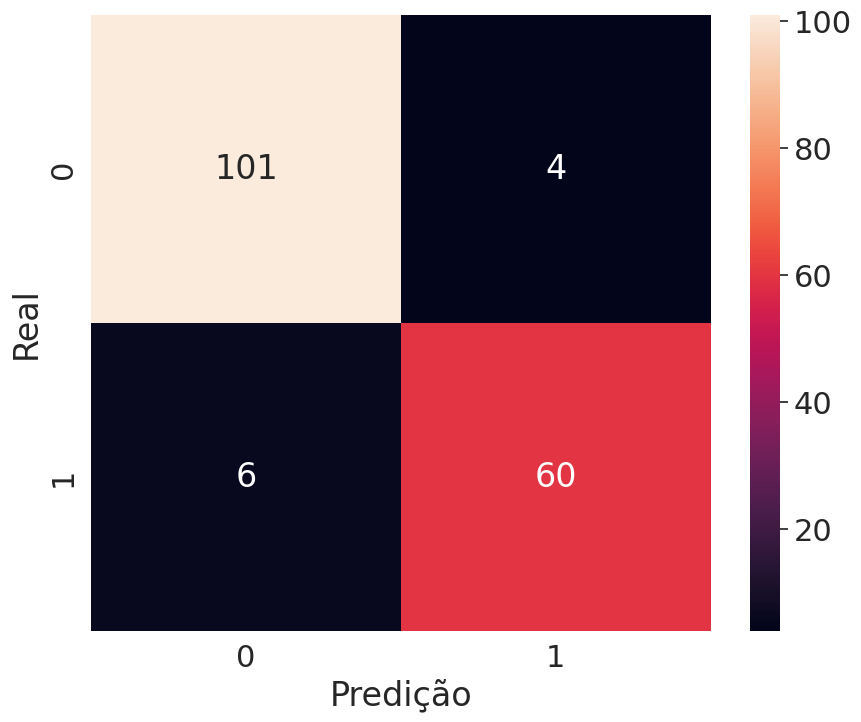

In [ ]:
plt.figure(figsize=(10, 8))
sns.set(font_scale=2 )
sns.heatmap(conf_matrix, annot=True, fmt='d').set(xlabel = 'Predição', ylabel= 'Real')

### Através da acurácia, utilizar um novo classificador que dá as pontuações conforme as maiores notas. Ou seja, com base nas kbest options.
  1. Recursive Feature Elimination (RFE):

In [ ]:
# Implementação do modelo
# RFE(estimator, n_features_to_select, step, varbose)
from sklearn.feature_selection import RFE

SEED = 1234
random.seed(SEED)
treino_X, teste_X, treino_y, teste_y = train_test_split(valores_exames_v6,
                                                        diagnosticos,
                                                        test_size=0.3)
classificador = RandomForestClassifier(n_estimators=100, random_state=1234)
classificador.fit(treino_X, treino_y)
selecionar_rfe = RFE(estimator= classificador,
                     n_features_to_select= 5,
                     step= 1)
selecionar_rfe.fit(treino_X, treino_y)
treino_rfe = selecionar_rfe.transform(treino_X)
teste_rfe = selecionar_rfe.transform(teste_X)
# Saída serão os novos dados de treino e de teste

Resultado da classificação 90.06%


[Text(0.5, 40.249999999999986, 'Predição'), Text(77.25, 0.5, 'Real')]

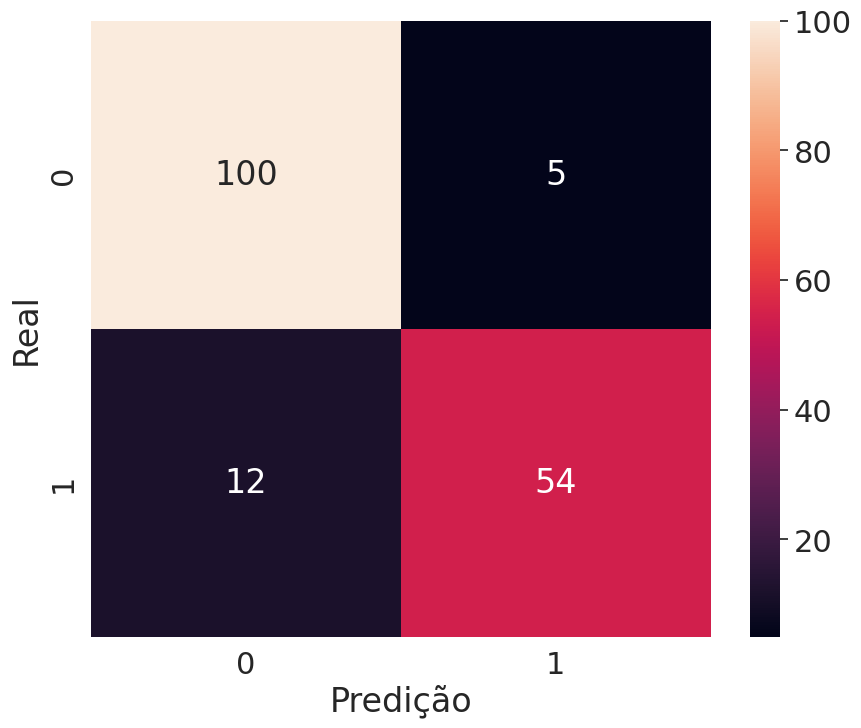

In [ ]:
# Resultados
classificador.fit(treino_rfe, treino_y)
print('Resultado da classificação %.2f%%' %(classificador.score(teste_rfe, teste_y)* 100))
conf_matrix = confusion_matrix(teste_y, classificador.predict(teste_rfe))
plt.figure(figsize=(10, 8))
sns.set(font_scale=2 )
sns.heatmap(conf_matrix, annot=True, fmt='d').set(xlabel = 'Predição', ylabel= 'Real')


### Utilização de um modelo que implementa a n melhor quantidades de features, que trará uma melhor precisão ao modelo.
  1. RFE CrossValidation: pega o banco de dados e divide em blocos. Aplica o algoritmo RFE em cada um dos blocos, gerando resultados. Capacidade de avaliar a quantidade de fatures para se gerar o melhor resultado.
    - features selecionadas: exame_1', 'exame_2', 'exame_5', 'exame_6', 'exame_7', 'exame_8',
       'exame_9', 'exame_10', 'exame_12', 'exame_13', 'exame_14', 'exame_15',
       'exame_16', 'exame_18', 'exame_19', 'exame_20', 'exame_21', 'exame_22',
       'exame_23', 'exame_25', 'exame_26', 'exame_27', 'exame_28', 'exame_30',
       'exame_31', 'exame_32

In [ ]:
from sklearn.feature_selection import RFECV

SEED = 1234
random.seed(SEED)
treino_X, teste_X, treino_y, teste_y = train_test_split(valores_exames_v6,
                                                        diagnosticos,
                                                        test_size=0.3)
classificador = RandomForestClassifier(n_estimators=100, random_state=1234)
classificador.fit(treino_X, treino_y)
selecionar_rfecv = RFECV(estimator= classificador,
                         cv= 5, # quantidade de blocos divididos
                         step= 1,
                         scoring='accuracy') # forma de avaliação
selecionar_rfecv.fit(treino_X, treino_y)
treino_rfecv = selecionar_rfecv.transform(treino_X)
teste_rfecv = selecionar_rfecv.transform(teste_X)

Resultado da classificação 92.98%


[Text(0.5, 40.249999999999986, 'Predição'), Text(77.25, 0.5, 'Real')]

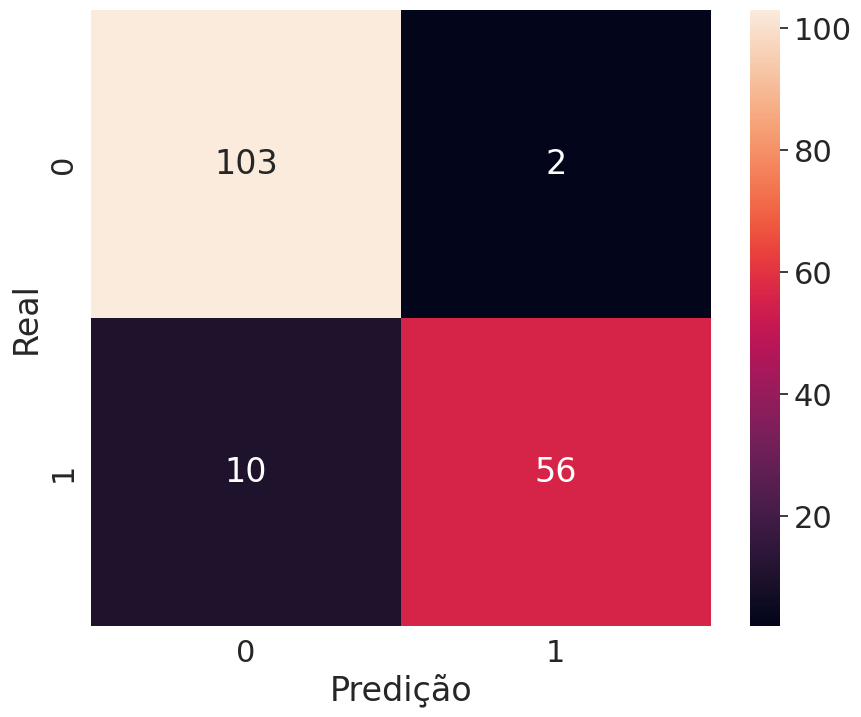

In [ ]:
classificador.fit(treino_rfecv, treino_y)
print('Resultado da classificação %.2f%%' %(classificador.score(teste_rfecv, teste_y)* 100))
conf_matrix = confusion_matrix(teste_y, classificador.predict(teste_rfecv))
plt.figure(figsize=(10, 8))
sns.set(font_scale=2 )
sns.heatmap(conf_matrix, annot=True, fmt='d').set(xlabel = 'Predição', ylabel= 'Real')

In [ ]:
treino_X.columns[selecionar_rfecv.support_]

Index(['exame_1', 'exame_2', 'exame_5', 'exame_6', 'exame_7', 'exame_8',
       'exame_9', 'exame_10', 'exame_12', 'exame_13', 'exame_14', 'exame_15',
       'exame_16', 'exame_18', 'exame_19', 'exame_20', 'exame_21', 'exame_22',
       'exame_23', 'exame_25', 'exame_26', 'exame_27', 'exame_28', 'exame_30',
       'exame_31', 'exame_32'],
      dtype='object')

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))
plt.xlabel("Numero de Exames")
plt.ylabel("Acurácia")
plt.grid() #coloca quadradinhos no fundo da imagem
plt.plot(range(1, len(selecionar_rfecv.cv_results_) +1), selecionar_rfecv.cv_results_) # x_axis = número de features

In [ ]:
valores_exames_v7 = selecionar_rfe.transform(valores_exames_v6)

In [ ]:
valores_exames_v7.shape # base de dados, reduzida a duas dimensões

(569, 5)

<Axes: >

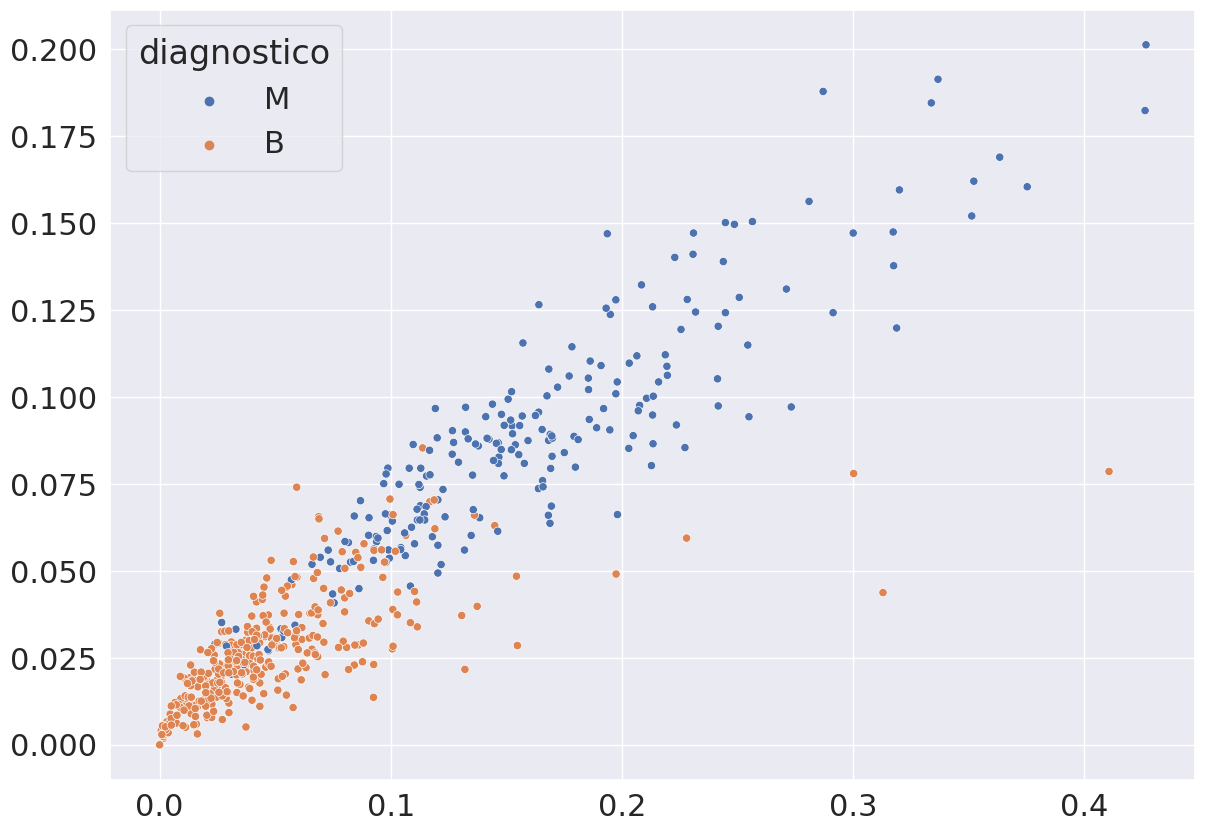

In [ ]:
# Distribuição das nossas observações -> perda significativa de informações
plt.figure(figsize= (14,10))
sns.scatterplot(x= valores_exames_v7[:, 0],
                y= valores_exames_v7[:, 1],
                hue= diagnosticos)

### Diferenciação entre os diferentes tipos de câncer
  1. Manter o máximo de informação possível, dentro de dimensões reduzidas
  2. PCA -> transformações matemáticas
    - pega os dados na qual as primeiras dimensões ficam as variáveis que mantém a maior quantidade possível de informação dos dados.